In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus

#### Creating the dataset

In [16]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [17]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

#### Training data

In [18]:
#какой-то подготовленный код
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


#### Test data

In [19]:
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive'] 
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


####  Some feature values are present in train and absent in test and vice-versa.

In [30]:
# # Some feature values are present in train and absent in test and vice-versa.
intersect_features(train=df_train, test=df_test)[0]

,Eloquence_average,Looks_handsome,Money_spent_lots,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_high,Money_spent_little,Looks_repulsive
0,0,1,1,0,1,1,0,0
1,0,1,0,0,1,0,1,0
2,1,1,1,1,0,0,0,0
3,1,0,0,1,0,0,1,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,1,0,1
6,1,1,1,0,1,0,0,0


<div class="alert alert-block alert-warning">
<b>Task 1:</b> 1. What is the entropy  S0  of the initial system? By system states, we mean values of the binary feature "Will_go" - 0 or 1 - two states in total.
</div>


In [50]:
df_train['Will_go']

0    0
1    1
2    0
3    1
4    1
5    0
6    0
Name: Will_go, dtype: int64

In [69]:
%%html
<img src="1.png",width=5, height=5>

<div class="alert alert-block alert-warning">
<b>Task 2:</b> 
Let's split the data by the feature "Looks_handsome". 
What is the entropy  S1  of the left group - the one with "Looks_handsome". 
What is the entropy  S2  in the opposite group? What is the information gain (IG) if we consider such a split?

</div>


In [66]:
df_train[['Will_go','Looks_handsome']]

,Will_go,Looks_handsome
0,0,1
1,1,1
2,0,1
3,1,0
4,1,0
5,0,0
6,0,1


In [70]:
%%html
<img src="2.png",width=5, height=5>

<div class="alert alert-block alert-warning">
<b>Task 3:</b> 
Train a decision tree using sklearn on the training data. You may choose any depth for the tree.


</div>

In [154]:
y_train=df_train['Will_go']
X_train=df_train.drop('Will_go',axis=1)
X_test=df_test
#y_test у нас нет

In [ ]:
#столбики в трейн и тесте разные, посмотрим где именно разные

In [122]:
X_train_set_columns=X_train.columns.tolist()

In [123]:
X_test_set_columns=X_test.columns.tolist()

In [126]:
X_train_set_columns_set=set(X_train_set_columns)

In [128]:
X_test_set_columns_set=set(X_test_set_columns)

In [139]:
unic_for_train=X_train_set_columns_set.difference(X_test_set_columns_set)

In [140]:
unic_for_test=X_test_set_columns_set.difference(X_train_set_columns_set)

In [148]:
len(unic_for_train)

1

In [149]:
len(unic_for_test)

0

In [158]:
#получается, что в train есть один уникальный столбик
unic_for_train

{'Eloquence_low'}

In [161]:
#видно, что этот столбик давольно важный, по нем можно неплохо предсказывать. 
df_train[['Will_go','Eloquence_low']] 

,Will_go,Eloquence_low
0,0,0
1,1,1
2,0,0
3,1,0
4,1,1
5,0,0
6,0,0


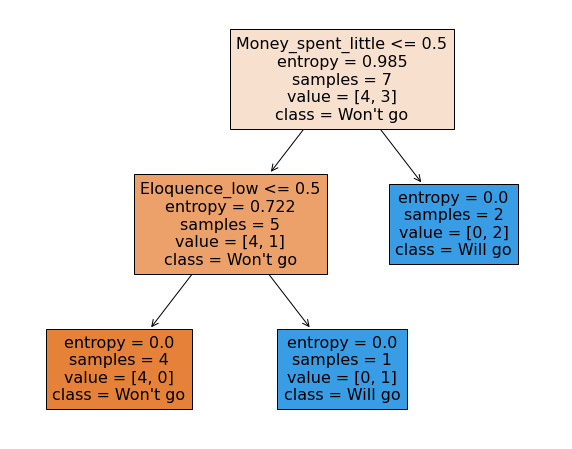

In [181]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=17)
dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(dt, feature_names=X_train.columns, filled=True,class_names=["Won't go",'Will go']
         );

<div class="alert alert-block alert-warning">
<b>Task 4:</b> 
Implement a function to calculate the Shannon Entropy

</div>

<img src='https://habrastorage.org/webt/bd/aq/5w/bdaq5wi3c4feezaexponvin8wmo.png'>

In [185]:
# two groups
balls_left  = [1 for i in range(8)] + [0 for i in range(5)] # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)] # 1 blue and 6 yellow

In [186]:
balls_left

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [206]:
balls_right 

[1, 0, 0, 0, 0, 0, 0]

In [266]:
from math import log
    
def entropy(a_list):
    lst = list(a_list)
    size = len(lst) 
    entropy = 0
    set_elements = len(set(lst))
    if set_elements in [0, 1]:
        return 0
    for i in set(lst):
        occ = lst.count(i)
        entropy -= occ/size * log (occ/size,2)
    return entropy



In [268]:
print(entropy(balls)) 
print(entropy(balls_left)) 
print(entropy(balls_right)) 
print(entropy([1,2,3,4,5,6]))

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


<div class="alert alert-block alert-warning">
<b>Task 5:</b>  What is the entropy of a fair dice? (where we look at a dice as a system with 6 equally probable states)?


</div>

In [271]:
%%html
#это не бинарная энтропия,тогда будет так
<img src="3.png",width=5, height=5>